In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [33]:
#extracting data for the base emotions df

data = pd.read_csv('c:/Data_Science/IH_Notebooks/IH_NLP_Final_Project/text.csv')
emotion_df = data.copy()

emotion_df.head()

emotion_df = emotion_df.drop(columns='Unnamed: 0')

print("First 3 rows of emotion_df after column drop: \n", emotion_df.head(3))

First 3 rows of emotion_df after column drop: 
                                                 text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4


In [34]:
#extracting the data for the hate df and violence df

data2 = pd.read_csv('c:/Data_Science/IH_Notebooks/IH_NLP_Final_Project/labeled_data.csv')

hate_df = data2.copy()

data3 = pd.read_csv('c:/Data_Science/IH_Notebooks/IH_NLP_Final_Project/Train.csv')
violence_df = data3.copy()

print(hate_df.head(3))
print(violence_df.head(3))

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
      Tweet_ID                                              tweet  \
0  ID_0022DWKP  Had a dream i got raped last night. By a guy i...   
1  ID_00395QYM  he thought the word raped means sex and told m...   
2  ID_003EOSSF  She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...   

              type  
0  sexual_violence  
1  sexual_violence  
2  sexual_violence  


In [35]:
#dropping unnecessary columns

violence_df = violence_df.drop(columns='Tweet_ID')

hate_df = hate_df[['tweet', 'class']]

print("First 3 rows of emotion_df after column drop: \n", emotion_df.head(3))

print("First 3 rows of hate_df after column drop: \n", hate_df.head(3))

print("First 3 rows of violence_df after column drop: \n", violence_df.head(3))

First 3 rows of emotion_df after column drop: 
                                                 text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
First 3 rows of hate_df after column drop: 
                                                tweet  class
0  !!! RT @mayasolovely: As a woman you shouldn't...      2
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...      1
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      1
First 3 rows of violence_df after column drop: 
                                                tweet             type
0  Had a dream i got raped last night. By a guy i...  sexual_violence
1  he thought the word raped means sex and told m...  sexual_violence
2  She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...  sexual_violence


In [36]:
#renaming the columns for hate and violence df

hate_df = hate_df.rename(columns={'tweet': 'text', 'class': 'label'})
violence_df = violence_df.rename(columns={'tweet': 'text', 'type': 'label'})

In [37]:
#cleaning the text

from my_functions import clean_text

emotion_df['clean_text'] = emotion_df['text'].apply(clean_text)

hate_df['clean_text'] = hate_df['text'].apply(clean_text)

violence_df['clean_text'] = violence_df['text'].apply(clean_text)

In [38]:
emotion_df = emotion_df.drop(columns='text')

hate_df = hate_df.drop(columns='text')

violence_df = violence_df.drop(columns='text')

#moving the label column back on the right of the df

emotion_label_placeholder = emotion_df.pop('label')

emotion_df['label'] = emotion_label_placeholder

hate_label_placeholder = hate_df.pop('label')

hate_df['label'] = hate_label_placeholder

violence_label_placeholder = violence_df.pop('label')

violence_df['label'] = violence_label_placeholder

#Checking the results

print("First 3 rows of emotion_df: \n", emotion_df.head(3))

print("First 3 rows of hate_df: \n", hate_df.head(3))

print("First 3 rows of violence_df: \n", violence_df.head(3))

First 3 rows of emotion_df: 
                                           clean_text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
First 3 rows of hate_df: 
                                           clean_text  label
0  as a woman you shouldnt complain about cleanin...      2
1  boy dats coldtyga dwn bad for cuffin dat hoe i...      1
2  dawg you ever fuck a bitch and she start to cr...      1
First 3 rows of violence_df: 
                                           clean_text            label
0  had a dream i got raped last night by a guy i ...  sexual_violence
1  he thought the word raped means sex and told m...  sexual_violence
2  she not talking to me i was raped by men moles...  sexual_violence


In [39]:
emotion_df = emotion_df.rename(columns={'clean_text': 'text'})

from sklearn.utils import resample

#resampling emotion_df to have 6000 rows

sadness = emotion_df.loc[emotion_df['label'] == 0]
joy = emotion_df.loc[emotion_df['label'] == 1]
love = emotion_df.loc[emotion_df['label'] == 2]
anger = emotion_df.loc[emotion_df['label'] == 3]
fear = emotion_df.loc[emotion_df['label'] == 4]
surprise = emotion_df.loc[emotion_df['label'] == 5]

undersampled_sadness = resample(sadness, replace=True, n_samples=1000, random_state=42)
undersampled_joy = resample(joy, replace=True, n_samples=1000, random_state=42)
undersampled_love = resample(love, replace=True, n_samples=1000, random_state=42)
undersampled_anger = resample(anger, replace=True, n_samples=1000, random_state=42)
undersampled_fear = resample(fear, replace=True, n_samples=1000, random_state=42)
undersampled_surprise = resample(surprise, replace=True, n_samples=1000, random_state=42)

dfs = [undersampled_sadness, undersampled_joy, undersampled_love, undersampled_anger, undersampled_fear, undersampled_surprise]

undersampled_emotion_df = pd.concat(dfs, ignore_index=True)

undersampled_emotion_df

,text,label
0,im feeling terrible,0
1,i am lbs overweight and the sudden burst of tr...,0
2,i usually feel resigned that if i know it i kn...,0
3,i was a part of that group but i left due to f...,0
4,i am so far from normal that it s not funny i ...,0
...,...,...
5995,i think is slowly killing me and feeling like ...,5
5996,i started feeling flu ish i was pretty surprised,5
5997,i have used these opportunities to feel contem...,5
5998,im sick of being exhausted all the time of rus...,5


In [40]:
violence_df = violence_df.rename(columns={'clean_text': 'text'})

sexual_violence = violence_df.loc[violence_df['label'] == 'sexual_violence']
physical_violence = violence_df.loc[violence_df['label'] == 'Physical_violence']
eet_violence = violence_df.loc[(violence_df['label'] == 'emotional_violence') | (violence_df['label'] == 'economic_violence') | (violence_df['label'] == 'Harmful_Traditional_practice')]

sexual_violence = resample(sexual_violence, replace=True, n_samples=2944, random_state=42)
physical_violence = resample(physical_violence, replace=True, n_samples=2000, random_state=42)
eet_violence = resample(eet_violence, replace=True, n_samples=1056, random_state=42)

dfs_violence = [sexual_violence, physical_violence, eet_violence]

undersampled_violence_df = pd.concat(dfs_violence, ignore_index=True)

print("First 3 rows of violence_df after resampling: \n", undersampled_violence_df)

First 3 rows of violence_df after resampling: 
                                                    text               label
0     shes strangling that poor dog crazy lady ive b...     sexual_violence
1     its good he did that i had a stalker once she ...     sexual_violence
2     tw rape murder this makes me so sad idk what t...     sexual_violence
3     winston maybe trump feels a mask makes him loo...     sexual_violence
4     one of the few times in my life im happy im ag...     sexual_violence
...                                                 ...                 ...
5995  now you reach for that you call me an obscenit...  emotional_violence
5996  i wasnt promoted because of a racist district ...   economic_violence
5997  i was fired from my job because i voted for ob...   economic_violence
5998                    openly he insulted me in public  emotional_violence
5999  he hit and humiliated me in public wife of pil...  emotional_violence

[6000 rows x 2 columns]


In [41]:
hate_df = hate_df.rename(columns={'clean_text' : 'text'})

hate_speech = hate_df.loc[hate_df['label'] == 0]
offensive_speech = hate_df.loc[hate_df['label'] == 1]
neutral_speech = hate_df.loc[hate_df['label'] == 2]

hate_speech = resample(hate_speech, replace=True, n_samples= 1430, random_state=42)
offensive_speech = resample(offensive_speech, replace=True, n_samples=2570, random_state=42)
neutral_speech = resample(neutral_speech, replace=True, n_samples=2000, random_state=42)

undersampled_hate_dfs = [hate_speech, offensive_speech, neutral_speech]

undersampled_hate_df = pd.concat(undersampled_hate_dfs, ignore_index=True)

print("First 3 rows of hate_df after resampling: \n", undersampled_hate_df.head(3))

First 3 rows of hate_df after resampling: 
                                                 text  label
0  i hate when faggots talk shit on here then blo...      0
1  jennifer lawrences nudes sooooo trash im still...      0
2  this kid looks like a retard when he tries hid...      0


In [42]:
main_violence_labels = ['sexual_violence', 'Physical_violence']

undersampled_violence_df['label'] = undersampled_violence_df['label'].apply(lambda x: x if x in main_violence_labels else 'EET')

In [43]:
violence_map ={
    'sexual_violence': 0,
    'Physical_violence': 1,
    'EET': 2
}

undersampled_violence_df['label'] = undersampled_violence_df['label'].map(violence_map)

undersampled_violence_df.head(3)

,text,label
0,shes strangling that poor dog crazy lady ive b...,0
1,its good he did that i had a stalker once she ...,0
2,tw rape murder this makes me so sad idk what t...,0


In [44]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mirko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
def stopword_removal(text):
    all_words = nltk.word_tokenize(text)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [48]:
undersampled_emotion_df['text'] = undersampled_emotion_df['text'].apply(stopword_removal)
undersampled_violence_df['text'] = undersampled_violence_df['text'].apply(stopword_removal)
undersampled_hate_df['text'] = undersampled_hate_df['text'].apply(stopword_removal)

In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([undersampled_emotion_df['text'], undersampled_violence_df['text'], undersampled_hate_df['text']]))

emotion_seq = tokenizer.texts_to_sequences(undersampled_emotion_df['text'])
violence_seq = tokenizer.texts_to_sequences(undersampled_violence_df['text'])
hate_seq = tokenizer.texts_to_sequences(undersampled_hate_df['text'])

In [51]:
max_length = 50
emotion_padded = pad_sequences(emotion_seq, maxlen = max_length, padding = 'post')
violence_padded = pad_sequences(violence_seq, maxlen = max_length, padding = 'post')
hate_padded = pad_sequences(hate_seq, maxlen = max_length, padding = 'post')

In [52]:
emotion_padded[2]

array([ 622,    1, 3341,   11,   11,  613,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [53]:
#creating numpy labels as arrays

emotion_label = np.array(undersampled_emotion_df['label'])
violence_label = np.array(undersampled_violence_df['label'])
hate_label = np.array(undersampled_hate_df['label'])

In [55]:
#different inputs for each dataset

emotion_input = emotion_padded
violence_input = violence_padded
hate_input = hate_padded

In [56]:
#defining the input layers

emotion_input_layer = keras.layers.Input(shape = (max_length,), name = 'emotion_input')
violence_input_layer = keras.layers.Input(shape = (max_length,), name = 'violence_input')
hate_input_layer = keras.layers.Input(shape = (max_length,), name = 'hate_input')

In [58]:
#creating an embedding layer shared for all inputs

embedding_layer = keras.layers.Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 128)

In [59]:
#applying the embedding layer to all of the inputs

emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [62]:
#defining the long short team memory layer to make the model more powerful

shared_lstm = keras.layers.LSTM(64, return_sequences = True)

In [63]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [ ]:
#Applying LSTM to all input

emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [66]:
#Average pooling of the vectors after embedding

shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [68]:
len(undersampled_emotion_df['label'].unique()), len(undersampled_violence_df['label'].unique()), len(undersampled_hate_df['label'].unique())

(6, 3, 3)

In [69]:
#output definition. 6 out put units as we have 6 emotions in the dataframe

emotion_output = keras.layers.Dense(6, activation = 'softmax', name = 'emotion_output')(emotion_features)
violence_output = keras.layers.Dense(6, activation = 'softmax', name = 'violence_output')(violence_features)
hate_output = keras.layers.Dense(6, activation = 'softmax', name = 'hate_output')(hate_features)

In [70]:
#Defining the model with Adam optimizer

model = keras.models.Model(inputs = [emotion_input_layer, violence_input_layer, hate_input_layer],
                           outputs = [emotion_output, violence_output, hate_output])

model.compile(optimizer = 'adam',
             loss = {
                 'emotion_output' : 'sparse_categorical_crossentropy',
                 'violence_output' : 'sparse_categorical_crossentropy',
                 'hate_output' : 'sparse_categorical_crossentropy'
             },
             metrics = {
                 'emotion_output' : 'accuracy',
                 'violence_output' : 'accuracy',
                 'hate_output' : 'accuracy'
             })

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 emotion_input (InputLayer)  [(None, 50)]                 0         []                            
                                                                                                  
 violence_input (InputLayer  [(None, 50)]                 0         []                            
 )                                                                                                
                                                                                                  
 hate_input (InputLayer)     [(None, 50)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 50, 128)              2711552   ['emotion_input[0][0]',   

In [72]:
Model: "functional_1"

In [73]:
#Training the model with 3 epochs and separate inputs

model.fit(x = {'emotion_input':emotion_input,
               'violence_input':violence_input,
               'hate_input':hate_input},
          y = {'emotion_output':emotion_label,
               'violence_output':violence_label,
               'hate_output':hate_label},
          epochs = 3,
          batch_size = 4)

Epoch 1/3
1500/1500 [==============================] - 57s 35ms/step - loss: 2.8208 - emotion_output_loss: 1.7390 - violence_output_loss: 0.2677 - hate_output_loss: 0.8141 - emotion_output_accuracy: 0.2352 - violence_output_accuracy: 0.9080 - hate_output_accuracy: 0.6708
Epoch 2/3
1500/1500 [==============================] - 52s 35ms/step - loss: 1.5586 - emotion_output_loss: 1.0803 - violence_output_loss: 0.0300 - hate_output_loss: 0.4483 - emotion_output_accuracy: 0.5472 - violence_output_accuracy: 0.9930 - hate_output_accuracy: 0.8440
Epoch 3/3
1500/1500 [==============================] - 52s 35ms/step - loss: 0.7683 - emotion_output_loss: 0.4910 - violence_output_loss: 0.0143 - hate_output_loss: 0.2630 - emotion_output_accuracy: 0.8433 - violence_output_accuracy: 0.9970 - hate_output_accuracy: 0.9150


In [74]:
prediction = model.predict({'emotion_input':emotion_input,
                           'violence_input':violence_input,
                           'hate_input':hate_input})

188/188 [==============================] - 3s 10ms/step


In [75]:
prediction

[array([[9.6841127e-01, 1.3002671e-02, 5.2048889e-04, 1.1011229e-02,
         6.6192215e-03, 4.3502246e-04],
        [9.5667821e-01, 1.9065812e-02, 1.3836363e-03, 1.3189171e-02,
         9.0458551e-03, 6.3733273e-04],
        [9.2856562e-01, 1.3310630e-02, 4.4769194e-04, 4.3351673e-02,
         1.2941481e-02, 1.3829538e-03],
        ...,
        [1.6317222e-03, 7.6062870e-03, 3.6862385e-04, 3.1814417e-03,
         1.0375246e-02, 9.7683662e-01],
        [3.7568915e-03, 1.1444903e-02, 6.4274366e-04, 7.1475245e-03,
         2.0857517e-02, 9.5615035e-01],
        [3.3081450e-02, 1.8343452e-01, 2.5911795e-03, 5.4939454e-03,
         3.9655369e-02, 7.3574352e-01]], dtype=float32),
 array([[9.9989879e-01, 7.6488017e-05, 1.9211406e-05, 1.4894923e-06,
         2.8964416e-06, 1.1961230e-06],
        [9.9979812e-01, 1.5588345e-04, 3.0189918e-05, 4.5091833e-06,
         7.6933384e-06, 3.6858728e-06],
        [9.9989951e-01, 8.1313345e-05, 1.3927839e-05, 1.4409306e-06,
         2.7570666e-06, 1.108

In [76]:
emotion_pred = np.argmax(prediction[0], axis = 1)
violence_pred = np.argmax(prediction[1], axis = 1)
hate_pred = np.argmax(prediction[2], axis = 1)

In [79]:
undersampled_emotion_df['label'].unique(), undersampled_violence_df['label'].unique(), undersampled_hate_df['label'].unique()

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([0, 1, 2], dtype=int64),
 array([0, 1, 2], dtype=int64))

In [81]:
def plot_cm(true, pred, title, labels):
    cf = confusion_matrix(true, pred, normalize = 'true')
    plt.figure(figsize = (7,6))
    sns.heatmap(cf, annot = True, cmap = 'Blues', xticklabels = labels, yticklabels = labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violence_labels_text = ['sexual_violence', 'physical_violence', 'EET']
hate_labels_text = ['Hate Speech', 'Offensive', 'Neither']

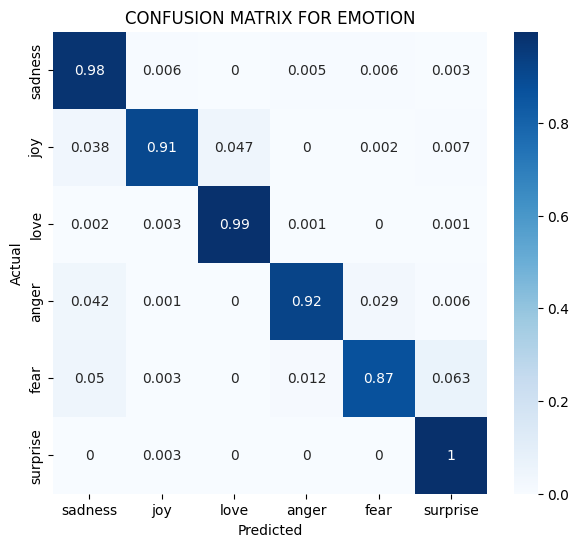

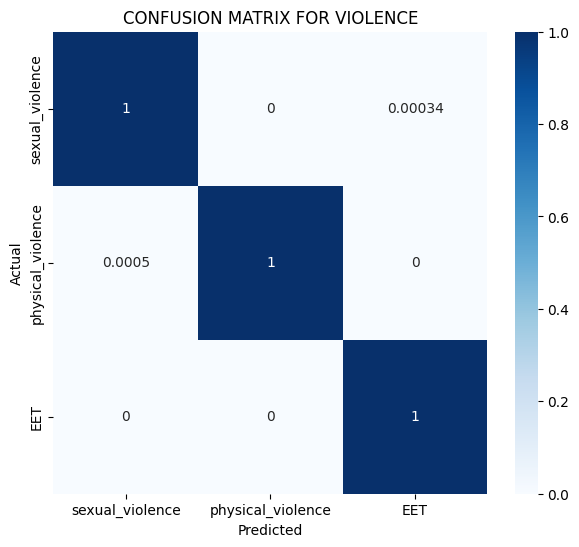

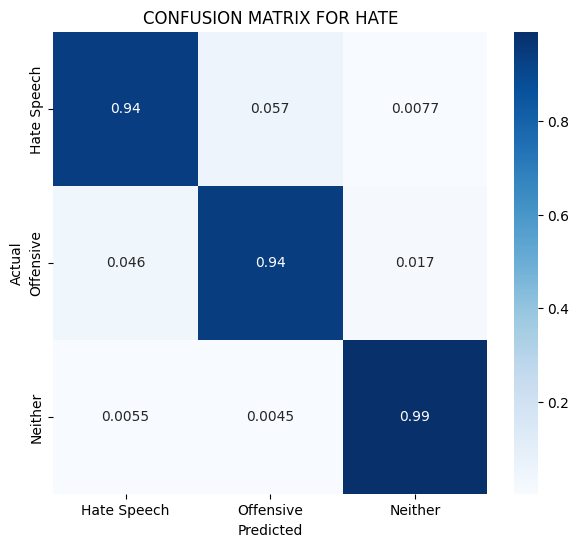

In [82]:
plot_cm(emotion_label, emotion_pred, 'CONFUSION MATRIX FOR EMOTION', emotion_labels_text)
plot_cm(violence_label, violence_pred, 'CONFUSION MATRIX FOR VIOLENCE', violence_labels_text)
plot_cm(hate_label, hate_pred, 'CONFUSION MATRIX FOR HATE', hate_labels_text)

In [83]:
model.save("models/emotion_hate_violence_model")

INFO:tensorflow:Assets written to: models/emotion_hate_violence_model\assets


INFO:tensorflow:Assets written to: models/emotion_hate_violence_model\assets


In [101]:
import re
import nltk
from nltk.corpus import stopwords 
from my_functions import stopword_remove
stop_words = set(stopwords.words('english'))

In [102]:
def stopword_remove(text):
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    
    return text

In [115]:
def classify_text(input_text):
    #PREPROCESS THE INPUT TEXT
    input_text_cleaned = stopword_remove(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequence, maxlen = max_length, padding = 'post')
    #PREDICTION
    predictions = model.predict({'emotion_input': input_padded,
                                'violence_input' : input_padded,
                                'hate_input' : input_padded})
    emotion_pred = np.argmax(predictions[0], axis  =1)[0]
    violence_pred = np.argmax(predictions[1], axis  =1)[0]
    hate_pred = np.argmax(predictions[2], axis  =1)[0]
    #DETERMINE MAJOR LABEL
    major_labels = ['Emotion', 'Violence', 'Hate']
    major_label_index = np.argmax([np.max(predictions[0]), np.max(predictions[1]), np.max(predictions[2])])
    major_label = major_labels[major_label_index]
    #DETERMINING SUB LABELS
    emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    violence_labels_text = ['sexual violence', 'physical violence', 'eet']
    hate_labels_text = ['Hate Speech', 'Offensive', 'Neither']

    if major_label == 'Emotion':
        sub_label = emotion_labels_text[emotion_pred]
    elif major_label == 'Violence':
        sub_label = violence_labels_text[violence_pred]
    else:
        sub_label = hate_labels_text[hate_pred]

    return major_label, sub_label

In [117]:
classify_text("Jews belong in the oven")

1/1 [==============================] - 0s 18ms/step


('Violence', 'eet')

In [118]:
test = pd.read_csv('c:/Data_Science/IH_Notebooks/IH_NLP_Final_Project/Test.csv')
test

,Tweet_ID,tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,..."
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l..."
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i..."
...,...,...
15576,ID_ZZR1D21T,A Teesside charity has filed a “super complain...
15577,ID_ZZSQF54Y,he ... forced me to have sex with him.
15578,ID_ZZTN5126,Female student of medical university raped at ...
15579,ID_ZZWS0XZZ,Bokamoso Mpembe (20 months) (Kidnapped and kil...


In [119]:
test = test.drop(columns='Tweet_ID')

In [120]:
adam_df = test.copy()
adam_df

,tweet
0,"because he was my boyfriend, and if I said no,..."
1,"lol no, I'm telling you it's not legal. It's l..."
2,Somalia's semi-autonomous Puntland region has ...
3,University of Cape Coast students being robbed...
4,"""Somebody came up behind him and stabbed him i..."
...,...
15576,A Teesside charity has filed a “super complain...
15577,he ... forced me to have sex with him.
15578,Female student of medical university raped at ...
15579,Bokamoso Mpembe (20 months) (Kidnapped and kil...


In [121]:
adam_df['prediction'] = adam_df['tweet'].apply(classify_text)

1/1 [==============================] - 0s 21ms/step


In [127]:
pd.set_option('display.max_colwidth', None)

In [128]:
adam_df['prediction'].value_counts()

prediction
(Violence, sexual violence)      9133
(Violence, eet)                  3746
(Emotion, sadness)               1181
(Hate, Neither)                  1104
(Violence, physical violence)     200
(Emotion, anger)                  123
(Hate, Hate Speech)                90
(Emotion, joy)                      4
Name: count, dtype: int64

In [129]:
adam_df.sample(20)

,tweet,prediction
1021,"I get you there. Its been a long time since I read it but basically she got raped by her best friends boyfriend and her best friend never believed it happened to her. She used to be popular, but after that she was ostracized.","(Violence, sexual violence)"
10364,what is it about Leon that makes me wanna see his face twist with euphoria while he’s getting stabbed with a giant hunting knife like idk dude.,"(Hate, Neither)"
3771,TW// when i was in college my first and did not want to have sex anymore i was forced to keep going until he “finished” i feel so gross about it to this day. he also had forced me to do sexual acts i wasn’t comfortable while while he recorded me /:,"(Violence, sexual violence)"
344,"Unless you look at Midsommar. The boyfriend, while an asshole, was raped by the cult of women and then murdered which is sad because it was viewed as him living a typical male fantasy but he was drugged and forced to copulate and if it was a woman it would have been received bad","(Violence, sexual violence)"
6734,"""He forced me to have sex against my Will"" -- gay guy happily recounting a threesome","(Violence, sexual violence)"
8326,shanked is slang for stabbed with a knife! He just mock shanked me... Nice huh?,"(Hate, Neither)"
4499,"On university campus students get robbed, raped and kidnapped the levels of rape and violence against women are insanely high in Jamaica it’s not better than America","(Violence, sexual violence)"
13518,"I can’t even begin to tell you how “happy” this makes me. I was repeatedly raped between the ages of 3-6 by a Roman Catholic priest. By the grace of God and forgiveness, I am healed and at peace.","(Violence, sexual violence)"
15534,"A 20-year-old African woman was allegedly tricked during a consultation session, where the pastor/traditional healer allegedly raped her. The pastor in Limpopo, Africa, was arrested by the police on Sunday.","(Violence, sexual violence)"
15279,"I Was Also Told By An Imperialist Pawn Popularly Known As Pastor That I Should Accept Christ As My Personal Lord And Saviour Or End Up In Hell. I Too Responded That I Don't Think There Is Any Place As Hellish As The Raped, Looted, Underdeveloped And Poisoned African Countries.","(Violence, sexual violence)"


In [139]:
# Copy the DataFrame
adam_df_hate = adam_df.copy()

adam_df_hate

,tweet,prediction
0,"because he was my boyfriend, and if I said no, he would get mad at me. I hated sex after that because I forced myself to have sex with him so he wouldn’t verbally abuse me.","('Emotion', 'anger')"
1,"lol no, I'm telling you it's not legal. It's literally a crime. The conversation about raising the age of consent is one that needs to be had. But it doesn't change the fact that forced marriage and child marriage and FGM are illegal. The law was changed to specifically cover","('Violence', 'eet')"
2,"Somalia's semi-autonomous Puntland region has taken its first step toward banning ""in a country where almost all women &amp; girls are forced to undergo the internationally condemned practice.""","('Violence', 'eet')"
3,University of Cape Coast students being robbed and raped by armed robbers [videos],"('Violence', 'sexual violence')"
4,"""Somebody came up behind him and stabbed him in the back with a really long black knife."" Jordan White's boss tells me a stranger attacked the Restaurant Orsay server while he was out with friends in Five Points. I'm live at 5 on CBS47","('Emotion', 'sadness')"
...,...,...
15576,"A Teesside charity has filed a “super complaint” against alleged systemic mishandling of sexual abuse cases by police forces. ⚠️ content warning: honour-based violence, sexual and domestic abuse, forced marriage, and female genital mutilation (FGM).","('Violence', 'eet')"
15577,he ... forced me to have sex with him.,"('Violence', 'sexual violence')"
15578,Female student of medical university raped at gunpoint in Lahore,"('Violence', 'sexual violence')"
15579,Bokamoso Mpembe (20 months) (Kidnapped and killed by mother’s ex-boyfriend - Aug 2020) Bridgenay Slingers (18) (Murdered by ex-boyfriend) Carol Pienaar (raped and murdered no further details available but case closed) Clarissa Lindor (27) (beaten to death by boyfriend),"('Violence', 'sexual violence')"


In [140]:
adam_df['prediction'].apply(type).value_counts()

prediction
<class 'str'>    15581
Name: count, dtype: int64

In [ ]:
import ast

adam_df['prediction'] = adam_df['prediction'].apply(ast.literal_eval)

In [142]:
adam_df_hate = adam_df[adam_df['prediction'].apply(lambda x: x[0] == 'Hate')]

adam_df_hate

,tweet,prediction
13,i stabbed my father in the arm with a knife because he tried playing games with me,"(Hate, Hate Speech)"
23,"(2/2) So his older sister pulled out a rolling pin and was acting like she was gonna hit me with it, so he decided to pull out a knife and hold it behind me. So I didn't even know he had the knife, and i just turned around to block the rolling pin, and then the mf stabbed me😭","(Hate, Neither)"
26,"He began to back up,barely able to move. As blood poured from his mouth,as he pulled the knife she had stabbed him with out of his chest,as he stood up and began to run for his life. Not making it very far before he fell down “Look I’ll do anything you want don’t kill me!”","(Hate, Hate Speech)"
27,"Session Why would Christie Martin say ""that is the knife that stabbed me"" instead of that is the knife he stabbed me with.","(Hate, Neither)"
39,Almost stabbed with a butter knife cos I thought he was gonna slap me...,"(Hate, Neither)"
...,...,...
15506,"Do this for disabilities as well! A disability does not equate to being unable to do the job... being Autistic, I’ve been denied plenty of jobs because of this...","(Hate, Neither)"
15518,"This guy just called me an “idiot”, “brainwashed” and yelled at me after I asked him for some distance at the farmer’s market. Would recommend avoiding him if you see him there, he’s a frequent visitor. I reminded him we all wear pants, alerted staff, left","(Hate, Neither)"
15532,i had a dream that i was in a knife fight with some1....and he threw a knife at me and i dodged it like a G...then i stabbed the fucker,"(Hate, Neither)"
15539,"You may or may not have heard this story, but Talib Kweli (before he became a rapper) once half-carried me to the school nurse's office after an asshole kid in our theater club stabbed me in the leg with a steak knife. Weird situation, but Talib was always really cool and nice.","(Hate, Neither)"
